# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

***Who***
* Marketing Team: They are interested in understanding customer demographics and purchasing behavior to tailor marketing campaigns more effectively.

* Data Scientists and Analysts: These professionals will be working directly with the dataset to build machine learning models. They need to understand the data structure and its nuances.

* Sales Team: Insights from the data can help the sales team target their efforts more efficiently, focusing on demographics that are more likely to make purchases.

* Executives and Decision Makers: High-level stakeholders will use insights from the data to make strategic business decisions and allocate resources.

* Product Development Team: Understanding customer demographics can help this team develop products that better meet the needs of the market.

***What***
* Demographic Data: Age, gender, income level, education, geographic location, etc. This helps in segmenting the market.

* Purchase Data: Information on whether customers made purchases, what they bought, how often, and the amount spent. This data is crucial for understanding buying patterns.

* Customer Behavior: Insights into customer behavior such as browsing history, engagement with marketing campaigns, and feedback. This helps in creating more personalized marketing strategies.

* Campaign Performance: Metrics on the performance of past marketing campaigns to identify what works and what doesn't.

***How***
* Data Cleaning and Preparation: Ensuring the data is clean, consistent, and formatted correctly for machine learning models.

* Exploratory Data Analysis (EDA): Understanding the dataset through visualization and summary statistics to identify patterns and relationships.

* Feature Engineering: Creating new features from the existing data to improve the performance of machine learning models.

* Model Selection and Training: Choosing appropriate machine learning algorithms and training the models on the dataset.

* Model Evaluation: Assessing the performance of the models using metrics like accuracy, precision, recall, and F1-score.

* Deployment and Monitoring: Deploying the models into a production environment and continuously monitoring their performance to ensure they remain effective.

# 3. Homework - work with your own data

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

In [2]:
df_marketing = pd.read_csv('marketing.csv')

C:\Users\dave\AppData\Local\Temp\ipykernel_19512\3971815645.py:1: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_marketing = pd.read_csv('marketing.csv')


In [3]:
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336006 entries, 0 to 336005
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   336006 non-null  object 
 1   Year_Birth           336006 non-null  object 
 2   Education            336006 non-null  object 
 3   Marital_Status       336006 non-null  object 
 4   Income               336006 non-null  int64  
 5   Kidhome              336006 non-null  int64  
 6   Teenhome             336006 non-null  object 
 7   Dt_Customer          336006 non-null  object 
 8   Recency              336006 non-null  int64  
 9   MntWines             336006 non-null  int64  
 10  MntFruits            336006 non-null  int64  
 11  MntMeatProducts      336006 non-null  int64  
 12  MntFishProducts      336006 non-null  int64  
 13  MntSweetProducts     336006 non-null  int64  
 14  MntGoldProds         336006 non-null  int64  
 15  NumDealsPurchases

In [4]:
df_marketing.describe()

,Income,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,336006.000000,336006.000000,336006.000000,336006.000000,336006.000000,336006.000000,336006.000000,336006.000000,336006.000000,336006.000000,...,336006.000000,336006.000000,336006.000000,336006.00000,336006.000000,336006.000000,336006.000000,336006.000000,336006.000000,336005.000000
mean,81229.765436,0.441641,48.687259,307.981113,26.586865,166.555023,40.894835,28.413701,43.870246,2.371940,...,4.924662,0.498515,0.500804,0.50078,0.500113,0.497929,0.009384,3.000024,10.999970,0.500016
std,126181.552940,0.538449,28.964723,333.526305,39.336844,225.632264,53.085507,40.434937,52.015376,2.079078,...,2.786390,0.499999,0.500000,0.50000,0.500001,0.499996,0.096507,0.013801,0.017251,0.500001
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000
25%,3153.000000,0.000000,24.000000,38.000000,3.000000,16.000000,8.000000,5.000000,8.000000,1.000000,...,3.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,3.000000,11.000000,0.000000
50%,42860.500000,0.000000,49.000000,176.000000,8.000000,66.000000,18.000000,10.000000,24.000000,2.000000,...,5.000000,0.000000,1.000000,1.00000,1.000000,0.000000,0.000000,3.000000,11.000000,1.000000
75%,89945.000000,1.000000,74.000000,499.000000,32.000000,232.000000,50.000000,34.000000,56.000000,3.000000,...,7.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000,3.000000,11.000000,1.000000
max,666662.000000,2.000000,103.000000,1541.000000,203.000000,1731.000000,278.000000,272.000000,368.000000,17.000000,...,22.000000,1.000000,1.000000,1.00000,1.000000,1.000000,3.000000,11.000000,11.000000,1.000000


In [5]:
#Duplicate Rows
df_marketing.duplicated().sum()

0

In [6]:
#Missing Values
df_marketing.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               1
dtype: int64

I would not add the missing data.  That column is not important for the analysis I want to do.

In [7]:
#Distinct value in the Education column with the count of each value
df_marketing['Education'].value_counts()

Education
Graduation    168590
PhD            73544
Master         57004
2n Cycle       30015
Basic           6852
Divorced           1
Name: count, dtype: int64

In [8]:
#Remove the row with the Education value Diivorced
df_marketing = df_marketing[df_marketing['Education'] != 'Divorced']

In [9]:
categorical_features = df_marketing.select_dtypes(exclude=['number']).columns.tolist()
numeric_features     = df_marketing.select_dtypes(include=['number']).columns.tolist()

# Print results if you want
print("Categorical Features:", categorical_features)
print("Numeric Features:", numeric_features)

Categorical Features: ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Teenhome', 'Dt_Customer']
Numeric Features: ['Income', 'Kidhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']


In [10]:
df_marketing.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,e20d011e-c904-4301-871d-4120e734f189,1956,2n Cycle,Together,40831,0,1,2022-07-21,62,636,...,5,1,1,1,1,1,0,3,11,1.0
1,9038499f-e82e-43d3-803d-165dba9afe48,1950,Graduation,Together,22537,1,1,2021-11-05,42,6,...,4,0,1,1,0,0,0,3,11,1.0
2,a3aaaf2a-c063-45ba-ac1a-ab375d53faa3,1960,PhD,Together,195755,1,0,2015-12-24,28,383,...,4,0,1,0,1,1,0,3,11,1.0
3,fabc6e91-6e59-4dd6-8d07-572b7f07b9e4,1980,PhD,Divorced,143143,0,0,2017-06-14,24,29,...,5,1,1,0,0,0,0,3,11,1.0
4,6bf0b99f-dd6d-4964-a3ca-1e98f500d9e1,1977,Graduation,Married,84648,0,1,2021-06-17,92,133,...,7,1,1,1,1,1,0,3,11,0.0


In [11]:
#convert Year_Birth to a numeric column
df_marketing['Year_Birth'] = pd.to_numeric(df_marketing['Year_Birth'], errors='coerce')

In [12]:
#display the unique values of the column teenhome
df_marketing['Teenhome'].unique()

array([1, 0, 2, '0', '1', '2'], dtype=object)

In [13]:
#convert the Dt_Customer column to datetime
df_marketing['Dt_Customer'] = pd.to_datetime(df_marketing['Dt_Customer'], errors='coerce')

In [14]:
#convert the column teenhome to a numeric column
df_marketing['Teenhome'] = pd.to_numeric(df_marketing['Teenhome'], errors='coerce')

In [15]:
#Distinct value in the Marital_Status column with the count of each value
df_marketing['Marital_Status'].value_counts()

Marital_Status
Married     127596
Together     83899
Single       70251
Divorced     34052
Widow        10025
Absurd        3480
Alone         3358
YOLO          3344
Name: count, dtype: int64

In [16]:
#One Hot Encoding 'Mariral_Status' and 'Education' columns
df_marketing_encoded = pd.get_dummies(df_marketing, columns=['Marital_Status', 'Education'])
#Save the encoded data to a new csv file
df_marketing_encoded.to_csv('marketing_encoded.csv', index=False)


In [17]:
#get the min and max values of the column Year_Birth
min_year_birth = df_marketing['Year_Birth'].min()
max_year_birth = df_marketing['Year_Birth'].max()

print("Min Year Birth:", min_year_birth)
print("Max Year Birth:", max_year_birth)

Min Year Birth: 1888
Max Year Birth: 2000


In [18]:
#get the min and max values of the column Dt_Customer
min_dt_customer = df_marketing['Dt_Customer'].min()
max_dt_customer = df_marketing['Dt_Customer'].max()

print("Min Dt Customer:", min_dt_customer)
print("Max Dt Customer:", max_dt_customer)

#create a new column Year Customer that contains the year of the column Dt_Customer as a numeric value
df_marketing['Year_Customer'] = df_marketing['Dt_Customer'].dt.year



Min Dt Customer: 2012-08-04 00:00:00
Max Dt Customer: 2023-09-15 00:00:00


Text(0, 0.5, 'Year Customer')

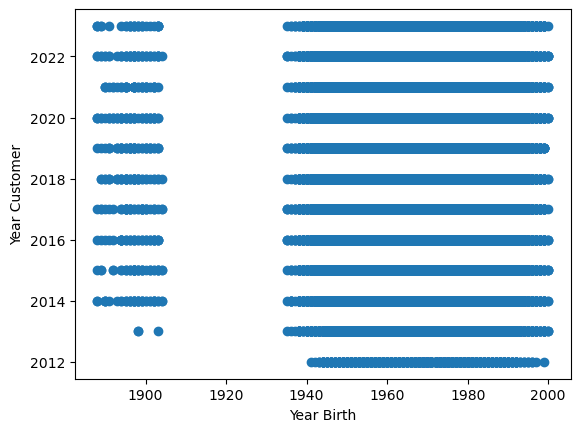

In [19]:
import matplotlib.pyplot as plt

plt.scatter(df_marketing["Year_Birth"], df_marketing["Year_Customer"])
plt.xlabel("Year Birth")
plt.ylabel("Year Customer")

Count of Records: 450


Text(0, 0.5, 'Year Customer')

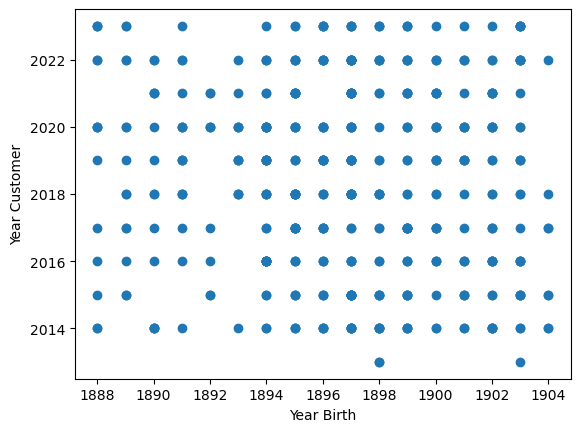

In [20]:
#create a subset of customers born before 1920
df_marketing_subset = df_marketing[df_marketing['Year_Birth'] < 1920]

#print the count of records in the subset
print("Count of Records:", df_marketing_subset.shape[0])

plt.scatter(df_marketing_subset["Year_Birth"], df_marketing_subset["Year_Customer"])
plt.xlabel("Year Birth")
plt.ylabel("Year Customer")

In [21]:
df_marketing_cleaned = df_marketing[df_marketing['Year_Birth'] > 1920]
df_marketing_cleaned.to_csv('marketing_cleaned.csv', index=False)

I have remove 450 records where the birth year was before 1920. There were no accounts created prior to 2012 so those individuals would not have been too old (greater than 100) to create those accounts. I have cleaned the rest of the data so that there are no column with inappropriate duplicate values. The data is usable. There are no missing values. There is no class imbalance. There was one row that had an inconsistent value in the Education column. I removed the row with divorce value for education.

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

In [22]:
df_marketing_cleaned.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year_Customer
0,e20d011e-c904-4301-871d-4120e734f189,1956,2n Cycle,Together,40831,0,1,2022-07-21,62,636,...,1,1,1,1,1,0,3,11,1.0,2022
1,9038499f-e82e-43d3-803d-165dba9afe48,1950,Graduation,Together,22537,1,1,2021-11-05,42,6,...,0,1,1,0,0,0,3,11,1.0,2021
2,a3aaaf2a-c063-45ba-ac1a-ab375d53faa3,1960,PhD,Together,195755,1,0,2015-12-24,28,383,...,0,1,0,1,1,0,3,11,1.0,2015
3,fabc6e91-6e59-4dd6-8d07-572b7f07b9e4,1980,PhD,Divorced,143143,0,0,2017-06-14,24,29,...,1,1,0,0,0,0,3,11,1.0,2017
4,6bf0b99f-dd6d-4964-a3ca-1e98f500d9e1,1977,Graduation,Married,84648,0,1,2021-06-17,92,133,...,1,1,1,1,1,0,3,11,0.0,2021


C:\Users\dave\AppData\Local\Temp\ipykernel_19512\201837346.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_marketing_cleaned['Year_Customer'] = df_marketing_cleaned['Dt_Customer'].dt.year
C:\Users\dave\AppData\Local\Temp\ipykernel_19512\201837346.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_marketing_cleaned['Year_Customer'] = df_marketing_cleaned['Year_Customer'].astype(int)
C:\Users\dave\AppData\Local\Temp\ipykernel_19512\201837346.py:5: SettingWithCopyWarning: 
A value is trying to be se

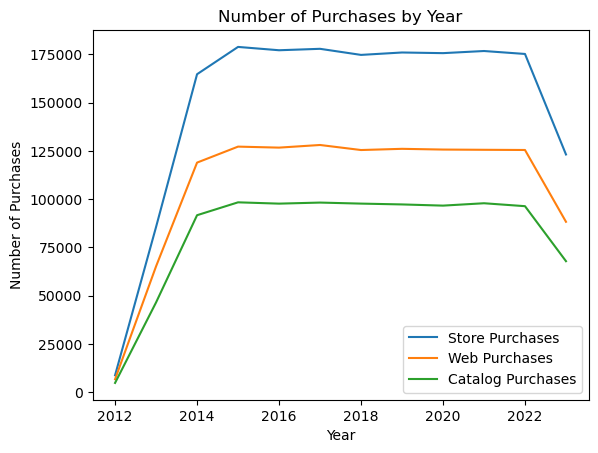

In [ ]:
df_marketing_cleaned['Year_Customer'] = df_marketing_cleaned['Dt_Customer'].dt.year
df_marketing_cleaned['Year_Customer'] = df_marketing_cleaned['Year_Customer'].astype(int)

df_marketing_cleaned['Total_Purchases'] = df_marketing_cleaned['NumStorePurchases'] + df_marketing_cleaned['NumWebPurchases'] + df_marketing_cleaned['NumCatalogPurchases']

df_marketing_cleaned_grouped = df_marketing_cleaned.groupby('Year_Customer').agg({'NumStorePurchases': 'sum', 'NumWebPurchases': 'sum', 'NumCatalogPurchases': 'sum'}).reset_index()

plt.plot(df_marketing_cleaned_grouped['Year_Customer'], df_marketing_cleaned_grouped['NumStorePurchases'], label='Store Purchases')
plt.plot(df_marketing_cleaned_grouped['Year_Customer'], df_marketing_cleaned_grouped['NumWebPurchases'], label='Web Purchases')
plt.plot(df_marketing_cleaned_grouped['Year_Customer'], df_marketing_cleaned_grouped['NumCatalogPurchases'], label='Catalog Purchases')

plt.xlabel("Year")
plt.ylabel("Number of Purchases")
plt.title("Number of Purchases by Year")
plt.legend()
plt.show()
